In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

Funkce na vykreslení obrázku

In [2]:
def plot_img(img):
    plt.figure(figsize=(18,20))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

Načtu obrázek v černobilém

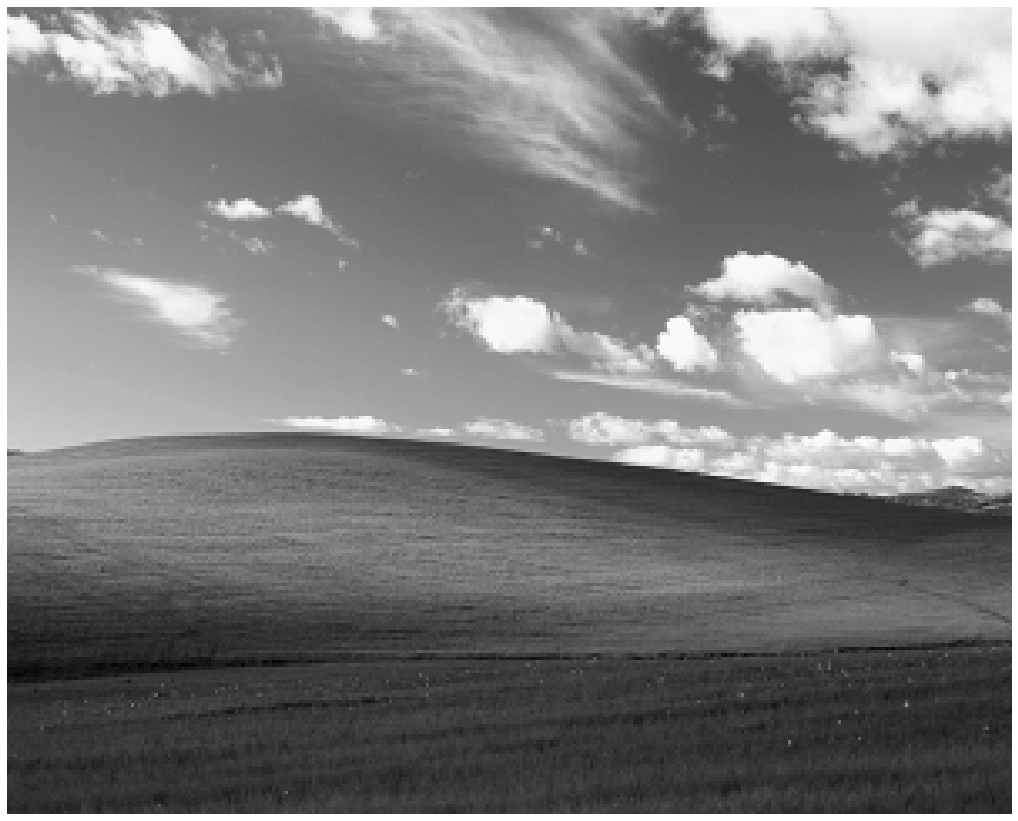

In [3]:
img = Image.open(r'input\windows_xp.jpg').convert('L')
plot_img(img)

Velikost obrazku

In [4]:
width, height = img.size
display(str(width) + "x"+ str(height))

'300x241'

Vytvořim uměle zašumeny obrazek

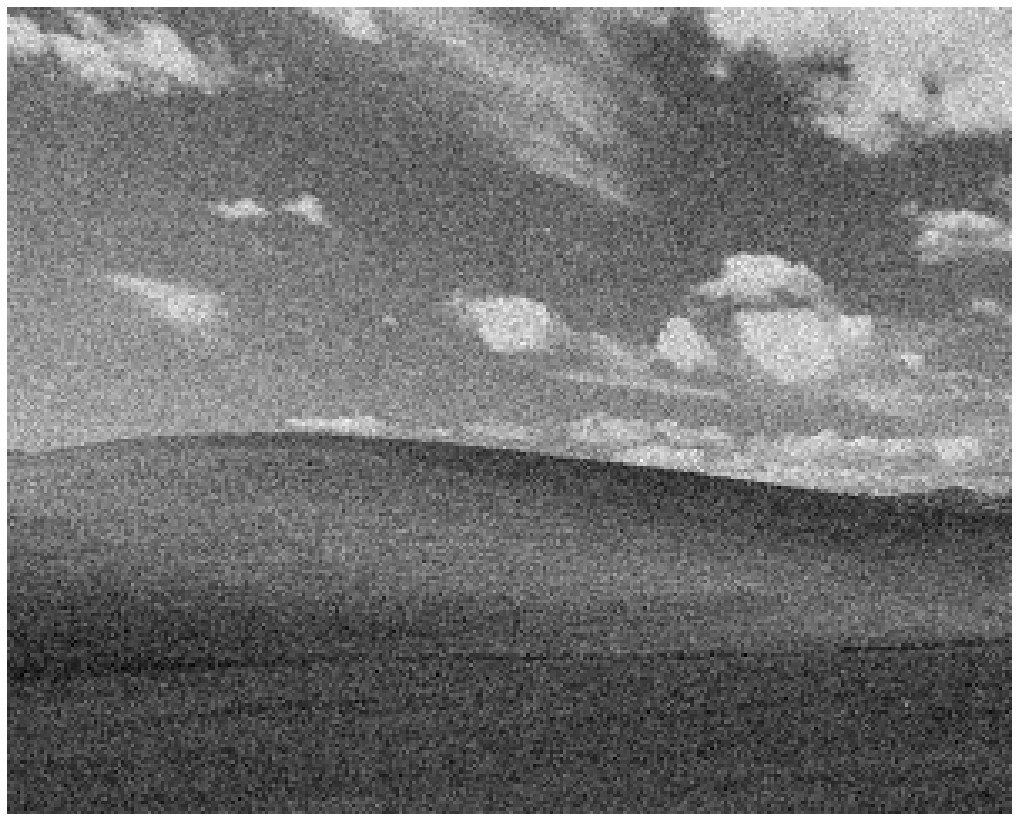

In [5]:
noisy = np.random.normal(img, 20)
plot_img(noisy)

Jelikož je větší množství dat v šířce tak jsem se rozhodl to řešit po řádcich (pouze transformace pomoci noisy.T)

In [6]:
pca = PCA(0.7).fit(noisy.T)
display(pca.n_components_)

19

In [7]:
display(np.sum(pca.explained_variance_ratio_))

0.7023618428256061

In [8]:
display(pca.explained_variance_ratio_)

array([0.20901676, 0.14982334, 0.09290967, 0.06076158, 0.04145214,
       0.02461499, 0.02028653, 0.01764914, 0.01552126, 0.00978725,
       0.00860446, 0.00802874, 0.00751279, 0.0073775 , 0.00640324,
       0.00608637, 0.00563539, 0.00548364, 0.00540705])

In [9]:
components = pca.transform(noisy.T)
display(components.shape)

(300, 19)

Vystupní obrázek:

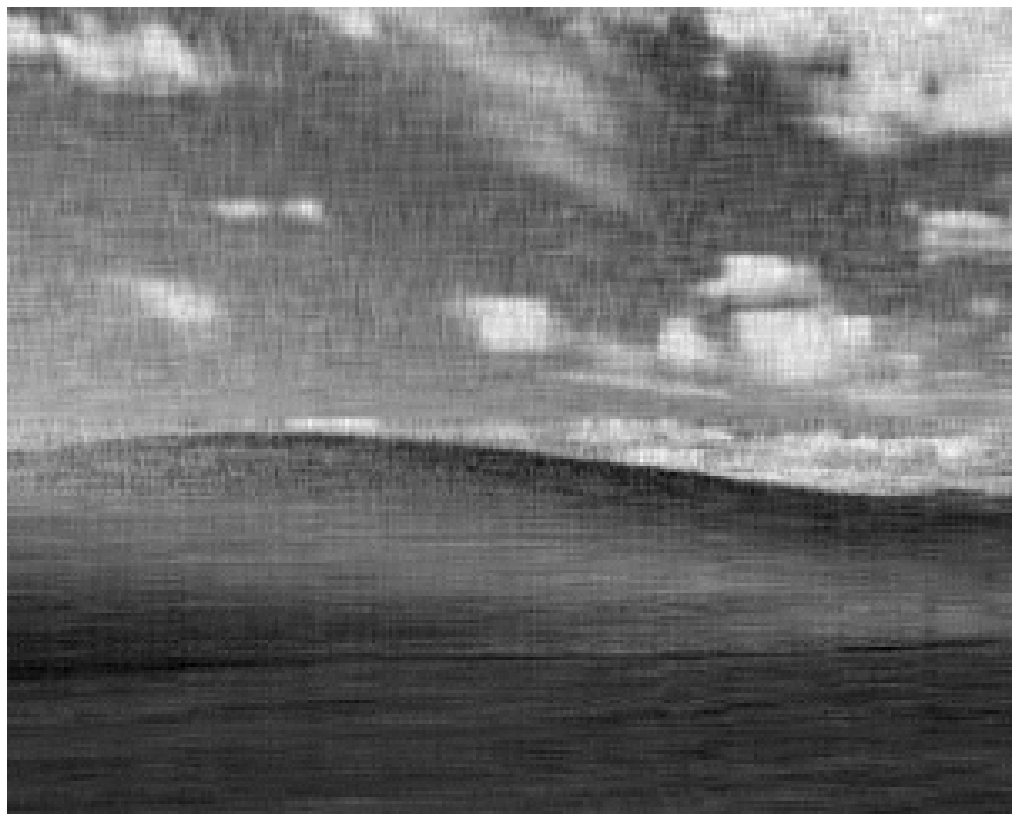

In [10]:
filtered = pca.inverse_transform(components)
plot_img(filtered.T)